# Notebook Dashboard

In [1]:
%pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [4]:
from PIL.Image import open, new, Image
from random import SystemRandom
from IPython.display import display

In [12]:
generator: SystemRandom = SystemRandom()

width: int = 512
height: int = 512

color_spectrum: str = 'RGB'

In [20]:
def generate_random_value_in_color_spectrum() -> int:
    global generator
    return generator.randint(0, 255)

In [28]:
def generate_random_rgb_noise_image(
    width: int, 
    height: int
) -> Image:
    global generator, color_spectrum
    image: Image = new(
        mode = color_spectrum, 
        size = (width, height), 
        color = 'white'
    )

    pixels = image.load()

    for x in range(width):
        for y in range(height):
            red, green, blue = pixels[x, y]

            red: int = generate_random_value_in_color_spectrum()
            green: int = generate_random_value_in_color_spectrum()
            blue: int = generate_random_value_in_color_spectrum()

            pixels[x, y] = (
                red, 
                green, 
                blue
            )

    return image

In [95]:
from math import sqrt, pow

def iterate_neighbors(
    image: Image, 
    color: tuple, 
    position: tuple, 
    x_range: tuple, 
    y_range: tuple
):
    pixels = image.load()

    smudge_red, smudge_green, smudge_blue = color
    origin_x, origin_y = position

    begin_x_at, end_x_at = x_range
    begin_y_at, end_y_at = y_range
    
    for x in range(begin_x_at, end_x_at):
        for y in range(begin_y_at, end_y_at):
            red, green, blue = pixels[x, y]

            relative_x: int | float = origin_x - x
            relative_y: int | float = origin_y - y

            length_of_relative: int = sqrt(
                pow(abs(relative_x), 2) 
                + 
                pow(abs(relative_y), 2)
            )

            smudge_value: float = 0.0

            if not(length_of_relative == 0.0):
                relative_x = relative_x / length_of_relative
                relative_y = relative_y / length_of_relative
            else:
                relative_x = 0.0
                relative_y = 0.0
            
            move_red_value: float = (smudge_red * relative_x) + (smudge_red * relative_y)
            move_green_value: float = (smudge_green * relative_x) + (smudge_green * relative_y)
            move_blue_value: float = (smudge_blue * relative_x) + (smudge_blue * relative_y)

            red = int(red - move_red_value)
            green = int(green - move_green_value)
            blue = int(blue - move_blue_value)
        
            pixels[x, y] = (red, green, blue)

    return image

def move_colors_to_neighbors(
    image: Image, 
    color: tuple, 
    x: int, 
    y: int,
    kernel: int
) -> Image:
    width, height = image.size

    x_begins_at: int = x - kernel
    x_ends_at: int = x + kernel

    if not (x_begins_at >= 0):
        x_begins_at = 0

    if x_ends_at >= width:
        x_ends_at = width
    

    y_begins_at: int = y - kernel
    y_ends_at: int = y + kernel

    if not(y_begins_at >= 0):
        y_begins_at = 0

    if y_ends_at >= height:
        y_ends_at = height
    
    image = iterate_neighbors(
        image, 
        color, 
        (x, y), 
        (x_begins_at, x_ends_at), 
        (y_begins_at, y_ends_at)
    )
    
    return image

def by_nears_neighbor(
    image: Image, 
    x: int, 
    y: int,
    kernel: int = 45
) -> Image:
    accessor = image.load()
    colors = accessor[x, y]

    move_colors_to_neighbors(
        image, 
        colors, 
        x, 
        y, 
        kernel
    )

    return image


def smudge(
    image: Image, 
    iterate: int
) -> Image:
    global generator

    width, height = image.size

    last_index_of_width: int = width - 1
    last_index_of_height: int = height - 1

    for index in range(iterate):
        x: int = generator.randint(
            0, 
            last_index_of_width
        )

        y: int = generator.randint(
            0, 
            last_index_of_height
        )

        by_nears_neighbor(
            image, 
            x, 
            y
        )

    return image

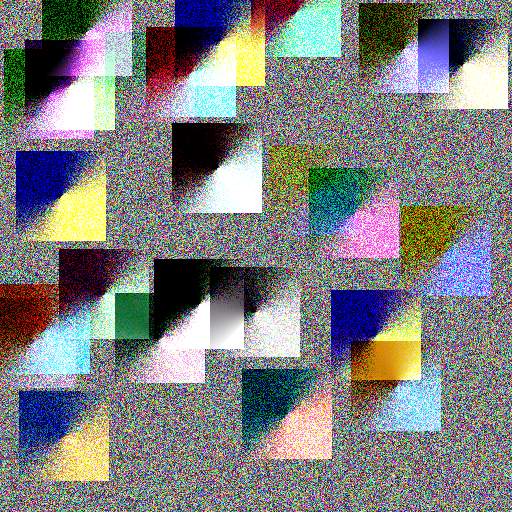

In [96]:
generate = generate_random_rgb_noise_image(
    width, 
    height
)

smudge(generate, 25)
display(generate)

In [ ]:
del generator, width, height, color_spectrum